# 1 Front End Coding (40 marks)
# 1.1 Wallet (15 marks)


# 1.2 Web Page with Financial Literacy Game (25 marks)

In [106]:
import json 
import requests
import os 
import pandas_datareader as pdr
import pandas as pd
import datetime

!pip install quandl
!pip install cryptocompare

import quandl
import cryptocompare

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# 2 Time Series and GD in Python and NumPy (15 marks)

In [107]:
# Set up API keys
quandl.ApiConfig.api_key = "Qs9gdP3HzSyXtuPdS-FF"
cryptocompare.api_key = "7b2846e17983e5ea4466a5ca5e45789d41ca5f164b65466e3ceadca058a153b2"

In [108]:
# Fetch data from Quandl API
start_date = "2018-01-01"
end_date = "2022-12-31"
xt = quandl.get("WIKI/GOOGL", start_date=start_date, end_date=end_date)["Close"]

In [109]:
# Fetch data from CryptoCompare API
from datetime import datetime

cc_hist = cryptocompare.get_historical_price_day(
    "BTC", currency="USD", toTs=datetime.strptime(end_date, "%Y-%m-%d"), limit=365
)
yt = pd.DataFrame(cc_hist)["close"]

In [110]:
# Make sure both time series have the same length
min_len = min(len(xt), len(yt))
xt = xt[-min_len:].values
yt = yt[-min_len:].values

In [111]:
import numpy as np

# Normalize the input data
xt_normalized = (xt - np.mean(xt)) / np.std(xt)

# Analytical OLS estimation
X = np.column_stack((np.ones(min_len), xt_normalized))
Y = yt.reshape(-1, 1)
beta = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Analytical OLS estimates (α, β):", beta.ravel())

Analytical OLS estimates (α, β): [17154.70169492  -188.63597584]


In [112]:
# Gradient Descent
alpha = 0.001  # Learning rate
iterations = 1000
m = min_len
theta = np.random.randn(2, 1)  # Random initialization

for _ in range(iterations):
    gradients = 2 / m * X.T @ (X @ theta - Y)
    theta = theta - alpha * gradients

print("Gradient Descent OLS estimates (α, β):", theta.ravel())

Gradient Descent OLS estimates (α, β): [14837.77383826  -163.11383438]


### Written question
1. The Gradient Descent method has a variant called Stochastic Gradient Descent(SGD). It chooses one sample at random from each cycle rather than using them all, and modifies the settings according to the gradient of that sample. This approach can help you escape local minimums and is easier on the computer, particularly for large datasets, but it might not converge as well.

Reference: Kansal, S. (2020, August 18). Quick Guide to Gradient Descent and Its Variants - Towards Data Science. Medium. https://towardsdatascience.com/quick-guide-to-gradient-descent-and-its-variants-97a7afb33add


2. Due to factors such as being nonconvex, having many dimensions, or having noisy data, it may be challenging to settle for a Loss Function minimum in practice. To overcome the issue we can regularise the loss function to prevent overfitting by adding a penalty term (using L1, L2 regularisation).

Reference: regularisation.dvi.pdf on ELE


# 3 AI and the Blockchain (15 marks)

### Discuss whether Bitcoin is Turing Complete. Include reference to Ian Grigg’s paper cited on the course and contrast this view to mainstream views. Also include your own view

Reference

Sgantzos, K., & Grigg, I. (2019). Artificial Intelligence Implementations on the Blockchain. Use Cases and Future Applications. Future Internet. https://doi.org/10.3390/fi11080170

Grigg (2019) states that "if the blockchain's transactional computing capability is Turing complete, then it can implement any algorithm including a cellular automaton." (Grigg, 2019, p.g 4). This contrast with the mainstream view that Bitcoin is not Turing complete due to the limitation that the Bitcoin script does not have the loop function (Grigg, 2019, p.g 3). It is also known that the Bitcoin script has been made to limit its capabilities, reduce possible security risks, and speed up execution.

Since it lacks loops, it cannot carry out calculations that take an infinite amount of time to complete. Although Grigg's proposed series of transactions is less efficient than more traditional looping structures, it does establish a mechanism for looping (Grigg, 2019, p.g 4).

Grigg's view on Transactional Turing Completeness is interesting. However, it does not imply Bitcoin is Turing complete. While Bitocin's scripting language can be used to simulate the Turing Process, the design's nature ultimately stops Bitcoin from becoming Turing Complete. Although generating a series of transactions that emulates looping capability is possible, this approach still needs to be more practical and efficient for computing designed for broader adoption.

Bitcoin is not Turing Complete due to its original design purpose. It is designed to lack functionality, so there is a lower risk when executing codes. Grigg's idea is appealing but not feasible at the moment.

### The following conversation between your module lead and ChatGPT 3.5 happened:Module Lead: Set a discussion question about ChatGPT, requiring  about a 250 word answer. ChatGPT: Discussion Question: How does ChatGPT differ from traditional chatbots, and what are the potential benefits and drawbacks of using a large language model like ChatGPT for conversational AI? Do you think this is a good question?

Reference: 

ChatGPT vs Traditional Chatbots: Which is Better? (2023). Paresh M Patel. https://www.pareshmpatel.com/chatgpt-vs-traditional-chatbots-which-is-better/#:~:text=Adaptability%20and%20Learning%3A%20Traditional%20chatbots,interactions%20and%20improve%20over%20time.


Yes, this is an excellent discussion question. The question consists of two aspects. Firstly it covers the differentiation between ChatGPT and traditional Chatbot. This will lead students to think about the features of ChatGPT that traditional Chatbot doesn't have, as well as bring some historical context of the evolution of machine learning covered in the lecture and neural networks, which is beyond the scope of the course. This will give students opportunities to link these with the development of ChatGPT.

Secondly, the question makes students reflect on how ChatGPT impacts the status quo of traditional Chatbot and the potential pros and cons it brings. For example, building a conventional Chatbot is cheaper and less complex, making it easier to implement and integrate into a platform. On the contrary, ChatGPT is a natural language processing technique that uses deep learning to generate human-like responses to questions. This requires a high level of language understanding, and the output may not be more predictable and straightforward than traditional Chatbot. What you get depends on the quality of your instructions to the model. (Paresh M Patel, 2023).

Overall, the suggested discussion question is well-thought-out and on-topic because it addresses the development of conversational AI and prompts an assessment of the pros and cons of employing cutting-edge models like ChatGPT. This question will keep students updated on the continued growth of conversational AI and encourages them to think critically about its impact on our society.

### Finally, in another 250 words to what extent do you think Blockchain technology could provide a solution to any systemic problems coming from AI? (again refer to the Ian Grigg paper, amongst other sources).

Reference:

Sgantzos, K., & Grigg, I. (2019). Artificial Intelligence Implementations on the Blockchain. Use Cases and Future Applications. Future Internet. https://doi.org/10.3390/fi11080170

Grigg's (2019) paper proposes several practical solutions to the systematic problems artificial intelligence brings. Firstly, Blockchain can ensure data integrity. Integrity is a method for ensuring the trustworthiness of data that has resulted from the development of cryptographic tools like digital signatures and hashes. Timestamping entails adding a document's hash to an unending chain of hashes generated regularly. Each block's time and the gaps between blocks ensure the accuracy of the time stamp(Grigg, 2019, p.5).

Secondly, Blockchain can ensure data security. With a digital signature, only the authorised pseudonymous agent can add new transactions to a blockchain. It's free and can be used for more than just money transfers, so it's hard for hackers to sneak in malicious code(Grigg, 2019, p.5).

Thirdly, Blockchain can solve the bias issue since its DLT technology can allow transparent access to data on the system. To avoid inconsistent data sets and erroneous results, triple-entry accounting ensures that software only uses reliable raw data as facts generated by third parties. This makes it easier for AI developers when creating datasets to train their algorithms(Grigg, 2019, p.6).

Last but not least, Blockchain gives accountability to AI systems since it uses transparent data that are tampered-proof, ensuring that every decision is broadcast to everyone, preventing suspicious behaviour.


# 4 Time Series Forecasting (30 marks)

### Stage 1: Description and Factors



Description:

The selection of the BTC/USD time series was based on the increasing importance of Bitcoin as a digital asset and its potential impact on the worldwide financial system. The increasig interest of investors, institutions, and regulators towards Bitcoin has rendered it imperative to comprehend the determinants that influence its valuation. Examining the correlations between BTC/USD and diverse economic indicators can yield significant findings regarding the dynamics of Bitcoin's valuation and its prospective function as an alternative investment vehicle.


Factors chosen:

1. Gold price (ID7108): As a traditional store of value, gold's price could affect Bitcoin's appeal as an alternative asset.
    
2. S&P 500 (SP500): Stock market performance may impact investor sentiment and influence Bitcoin's price as a speculative investment.

3. WTI Crude Oil price (DCOILWTICO): Fluctuations in oil prices can affect the overall economic outlook and impact Bitcoin's attractiveness.
    
4. CBOE Volatility Index (VIXCLS): The VIX can be an indicator of market sentiment and risk aversion, which could influence investors' interest in Bitcoin.
    `
5. Nominal Broad U.S. Dollar Index (DTWEXBGS): Changes in the value of the U.S. dollar can affect the value of Bitcoin in terms of USD.

6. Federal Funds Effective Rate (FEDFUNDS): Interest rate changes may impact investor preferences for riskier assets like cryptocurrencies.
    
7. Inflation rate (CPALTT01USM657N): Inflation can drive investors towards alternative stores of value like Bitcoin. 

8. Unemployment rate (UNRATE): Economic conditions, as reflected in unemployment rates, can impact the demand for cryptocurrencies.
    
9. 10-Year Real Interest Rate (REAINTRATREARAT10Y): Long-term interest rates can influence investment decisions and impact the attractiveness of Bitcoin.
    
10. Real Risk Premium (TENEXPCHAREARISPRE): The risk premium may affect investors' appetite for riskier assets like cryptocurrencies.

### Stage 2: Analysis

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [114]:
from fredapi import Fred
fred = Fred(api_key='347930fc73eb3d0d137f231467286220')

<AxesSubplot:>

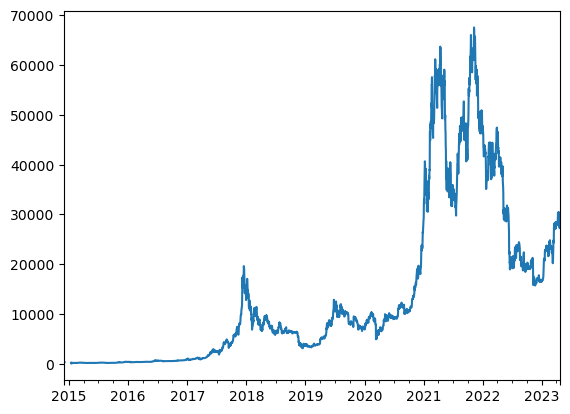

In [115]:
# Data
bitcoinprice =fred.get_series('CBBTCUSD')
bitcoinprice.plot()

In [116]:
#Convert data to a pandas DataFrame and set the index as a datetime index:
bitcoinprice_df = pd.DataFrame(bitcoinprice, columns=["Price"])
bitcoinprice_df.index = pd.to_datetime(bitcoinprice_df.index)

# Resample data
data_resampled = bitcoinprice_df.resample("D").mean()

#Handle missing data
data_clean = data_resampled.fillna(method='ffill')

#Normalize the data
data_normalized = (data_clean - data_clean.min()) / (data_clean.max() - data_clean.min())

In [117]:
# List of additional variable codes from FRED
variable_chosen = [
    'ID7108',            # Gold price
    'SP500',             # S&P 500
    'DCOILWTICO',        # WTI Crude Oil price
    'VIXCLS',            # CBOE Volatility Index:(VIXCLS)
    'DTWEXBGS',          # Nominal Broad U.S. Dollar Index 
    'FEDFUNDS',          # Federal Funds Effective Rate (FEDFUNDS)
    'CPALTT01USM657N',   # Inflation rate (CPI)
    'UNRATE',            # Unemployment rate
    'REAINTRATREARAT10Y',#10-Year Real Interest Rate (REAINTRATREARAT10Y)
    'TENEXPCHAREARISPRE',#Real Risk Premium (TENEXPCHAREARISPRE)
]

# Collect the data for each variable
additional_data = {}
for chosen in variable_chosen:
    additional_data[chosen] = fred.get_series(chosen)

In [118]:
import pandas as pd

# Combine all the data into a single DataFrame
all_data = pd.concat([bitcoinprice] + list(additional_data.values()), axis=1)
all_data.columns = ['BTC_USD'] + variable_chosen

In [119]:
# Resample to daily frequency
all_data = all_data.resample('D').mean()

# Handle missing values (e.g., forward-fill)
all_data.fillna(method='ffill', inplace=True)

# Normalize the data
all_data_normalized = (all_data - all_data.mean()) / all_data.std()

In [120]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np

# Drop any rows with NaN values
all_data_normalized = all_data_normalized.dropna()

# Replace infinity values with large finite numbers
all_data_normalized = all_data_normalized.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Define the target variable and features
X = all_data_normalized.drop(columns='BTC_USD')
y = all_data_normalized['BTC_USD']

In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Train the Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [123]:
# Make predictions and evaluate the performance on the training data
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f'Training Mean Squared Error: {mse_train}')
print(f'Training Mean Absolute Error: {mae_train}')
print(f'Training R^2 Score: {r2_train}')

# Make predictions and evaluate the performance on the test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Test Mean Squared Error: {mse_test}')
print(f'Test Mean Absolute Error: {mae_test}')
print(f'Test R^2 Score: {r2_test}')

Training Mean Squared Error: 0.1803011413739454
Training Mean Absolute Error: 0.27979241626252355
Training R^2 Score: 0.8221414650700191
Test Mean Squared Error: 0.16193861455956046
Test Mean Absolute Error: 0.2705436638582106
Test R^2 Score: 0.8281300161934251


In [124]:
# Get the variable importance
variable_importance = pd.Series(model.coef_, index=X.columns)

# Sort the variable importance
sorted_importance = variable_importance.abs().sort_values(ascending=False)

# Print the variable importance
print("Variable Importance:")
print(sorted_importance)

Variable Importance:
SP500                 0.807503
CPALTT01USM657N       0.107987
FEDFUNDS              0.105629
TENEXPCHAREARISPRE    0.009701
ID7108                0.000000
DCOILWTICO            0.000000
VIXCLS                0.000000
DTWEXBGS              0.000000
UNRATE                0.000000
REAINTRATREARAT10Y    0.000000
dtype: float64


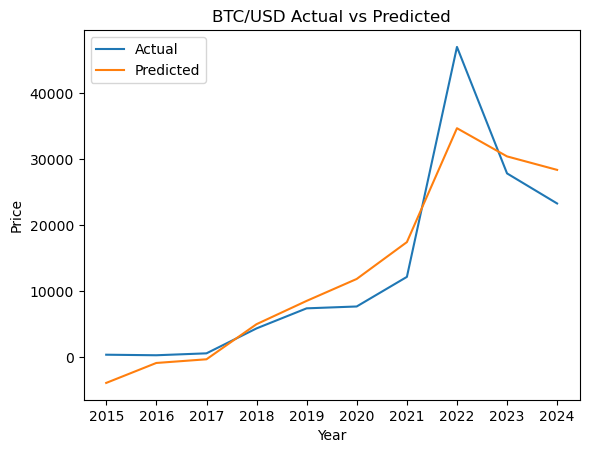

In [125]:
import matplotlib.dates as mdates

# Convert index back to datetime
y_test_datetime = pd.Series(y_test * all_data.std()['BTC_USD'] + all_data.mean()['BTC_USD'], index=y_test.index)
y_pred_datetime = pd.Series(y_pred * all_data.std()['BTC_USD'] + all_data.mean()['BTC_USD'], index=y_test.index)

# Create a DataFrame containing actual and predicted values
actual_vs_predicted = pd.DataFrame({"Actual": y_test_datetime, "Predicted": y_pred_datetime})

# Resample the DataFrame to annual frequency
actual_vs_predicted_annual = actual_vs_predicted.resample("Y").mean()

# Plot the Actual vs Predicted lines
fig, ax = plt.subplots()
ax.plot(actual_vs_predicted_annual.index, actual_vs_predicted_annual["Actual"], label="Actual")
ax.plot(actual_vs_predicted_annual.index, actual_vs_predicted_annual["Predicted"], label="Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_title("BTC/USD Actual vs Predicted")

plt.show()

Elastic Net's performance seems a good fit. First, training and test MSE values are 0.1803 and 0.1619. The model performs similarly on training and test data, showing neither overfitting nor underfitting. Training MAE is 0.2798, test MAE is 0.2705. The model performs similarly on training and test data since the MSE and MAE values are close.

Training and test R^2 scores are 0.8221 and 0.8281, respectively. The model explains 82% of the target variable's variation. Financial data is hard to model and predict. Therefore, this is beneficial.

The model's coefficient of 0.8075 suggests that the S&P 500 (SP500) is significant. Inflation (CPALTT01USM657N) and the Federal Funds Effective Rate (FEDFUNDS) contribute less. Gold price (ID7108), WTI Crude Oil price (DCOILWTICO), and unemployment rate (UNRATE) are irrelevant to the model's forecasts.

Overall, Elastic Net performs well. However, these metrics have limitations. Data for the factors are called from FRED API and are used to scrutinise the correlation between the value of Bitcoin and macroeconomic determinants. Certain variables may be difficult to measure, such as the effects of changes in regulations, geopolitical occurrences, or technological progressions within the blockchain space. 